<a href="https://colab.research.google.com/github/sahikapathan/ML-FILE-71/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving House Price Prediction Dataset.csv to House Price Prediction Dataset.csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('House Price Prediction Dataset.csv')

In [ ]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
df.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [ ]:
df.size

20000

In [ ]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [ ]:
df.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [ ]:
df['Condition'].unique()


array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [ ]:
df['Location'].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [ ]:
# removing the unnecessary columns
df = df.drop(columns=['Id'])

In [ ]:
#feature and target sepration
x=df.drop(columns=['Price'])
y=df['Price']

# x contains all input features
# y contains target variable or what we want to predict



In [ ]:
#train and test split
from sklearn.model_selection import train_test_split
#train and test split is to avoid the data leakage

x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)

# x_train -input data for training
# x_test -input data for testing
# y_train -correct answers for training
# y_test -correct answers for testing

# x_train + y_train - model learned
# x_test + y_test - model is evaluated
#stratify means spliting training and testing the data


In [ ]:
x_train.shape

(1600, 8)

In [ ]:
x_test.shape

(400, 8)

In [ ]:
x_train.dtypes

,0
Area,int64
Bedrooms,int64
Bathrooms,int64
Floors,int64
YearBuilt,int64
Location,object
Condition,object
Garage,object


In [ ]:
x_train.value_counts()

,,,,,,,,count
Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,
4973,1,1,1,1930,Rural,Poor,No,1
4970,4,4,3,1907,Urban,Excellent,Yes,1
4969,5,3,2,1919,Downtown,Good,Yes,1
4968,4,3,3,1945,Downtown,Excellent,No,1
4965,1,4,2,2005,Suburban,Excellent,No,1
...,...,...,...,...,...,...,...,...
505,5,4,1,1939,Suburban,Good,Yes,1
504,5,2,1,1925,Downtown,Fair,No,1
503,1,4,3,2012,Suburban,Poor,No,1


In [ ]:
y_train.value_counts()

,count
Price,
959222,2
458449,1
999453,1
184974,1
339176,1
...,...
967899,1
579148,1
954610,1


In [ ]:
y_test.value_counts()

,count
Price,
857662,1
88886,1
300396,1
506123,1
760463,1
...,...
223285,1
650243,1
66375,1


In [ ]:
# linear models and reguralization are sensitive to feature scalartype so before we encode categorocals and scale
categorical_cols=['Location','Condition','Garage']

numerical_cols=x_train.drop(columns=categorical_cols).columns

In [ ]:
categorical_cols,numerical_cols

(['Location', 'Condition', 'Garage'],
 Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt'], dtype='object'))

In [ ]:
#we will use oneHotEncoder cuz regression needs numbers if increases features=set up regularization need

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# ColumnTransformer is to apply diffrent preprocessing steps to diffrent columns in one go becsuse numerical cols need
# scalling,categorical cols need encoding, so we should not treat all colimns the same

In [ ]:
preprocesser = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_cols),
        ('cat',OneHotEncoder(drop='first'),categorical_cols)

    ]
)

#transformer =[]
#this is list of rules
#each rule follows this feather_format(name,transforamer,columns)


In [ ]:
#  The data has already been preprocessed. Now we can train a machine learning model using the processed data.
#   I've created a plan to train a Linear Regression model and evaluate its performance.
x_train_processed=preprocesser.fit_transform(x_train)
x_test_processed=preprocesser.transform(x_test)

In [ ]:
x_test_processed.shape

(400, 12)

In [ ]:
x_train_processed.shape

(1600, 12)

In [ ]:
#Linear Regression is a fundamental supervised learning algorithm used for predicting a continuous target variable
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_processed,y_train)

LinearRegression()

In [ ]:
y_train_pred=lr.predict(x_train_processed)
y_test_pred=lr.predict(x_test_processed)

# predicting on both so
# train prediction-check how well model learned
# test prediction-check how well model generalizes
# we predict on traini
ng data to see learning.in test to see the real world performance
#y_train_pred,y_test_pred

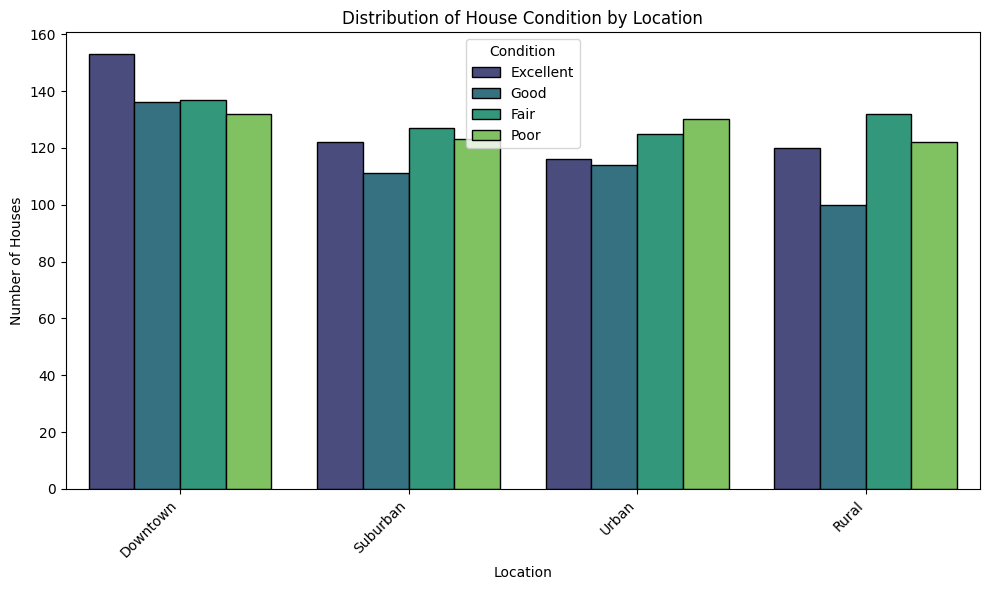

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location', hue='Condition', palette='viridis',edgecolor='black')
plt.title('Distribution of House Condition by Location')
plt.xlabel('Location')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3317782045.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Price', data=df, palette='viridis')


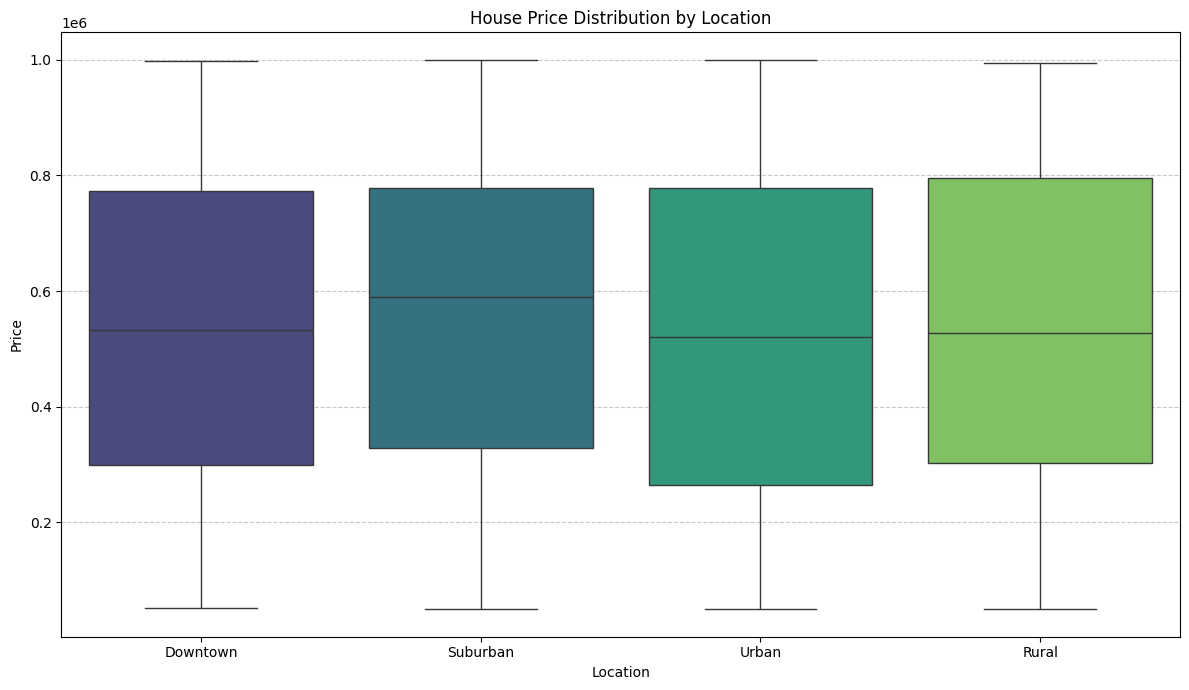

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(x='Location', y='Price', data=df, palette='viridis')
plt.title('House Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#error and residual interpretation

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# the reasson for using mar,mse,rmse,r2 is that we never judge a model by accuracy in LinearRegression
# there we used error based matrics
mae=mean_absolute_error(y_test,y_test_pred)
mse=mean_squared_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_test_pred)

print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2',r2)

#MAE tells the avg absolute difference between predicted
#and actual house prices
#we use this because it is easy to understand, same unit as price
# less sensitive to outlier (an outlier is a value that lies far away
#from the majority of values in the same col)

#MSE - its squares the error, so large mistakes are penalized more
#it highlights big prediction errors. used by many algorithms


# RMSE - it brings the erroe back to the original pricr unit , making it easier
# to connect or interrupt penalises large errors ,
#same unit ,comparing target _outdated

#r2 - R2 tells us how much of the variation in house price is explained by the model.

MAE 243241.97758826384
MSE 78321466146.0328
RMSE 279859.72583784326
R2 -0.006717808430749761


In [ ]:
# r2
# 0.0= model explains nothing
# 1.0= perfect model
# 0.00= model explains 80% of of the variation
# r2 < 0 = worse then avg prediction

In [ ]:
train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)

print('Train R2',train_r2)
print('Test R2',test_r2)

# evevthough our error values look resonable,the r2 score is
# neggetive, which tells us the model is not larninig meaningfull pattern
# this indicates underfitting and we need regularization or a better model


Train R2 0.009856184863687889
Test R2 -0.006717808430749761


In [ ]:
# Regularization (ridge and lasso)
# ridge regression


from sklearn.linear_model import Ridge
ridge=Ridge(alpha = 1.0)
ridge.fit(x_train_processed,y_train)

y_train_pred_ridge = ridge.predict(x_train_processed)
y_test_pred_ridge = ridge.predict(x_test_processed)

In [ ]:
from sklearn.metrics import r2_score

ridge_train_r2=r2_score(y_train,y_train_pred_ridge)
ridge_test_r2=r2_score(y_test,y_test_pred_ridge)

ridge_train_r2,ridge_test_r2

(0.009856156591055543, -0.006715935063532852)

In [ ]:
# lasso regression
# ridge reduce the impact of useless feature while lasso can completealy
# eliminate useless features
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0,max_iter=10000)
lasso.fit(x_train_processed,y_train)

y_train_pred_lasso=lasso.predict(x_train_processed)
y_test_pred_lasso=lasso.predict(x_test_processed)

# ridge-shrinks conficient
# lasso-shrinks amd can remove coefficient sometimes make them zero too

In [ ]:
lasso_train_r2=r2_score(y_train,y_train_pred_lasso)
lasso_test_r2=r2_score(y_test,y_test_pred_lasso)

lasso_train_r2,lasso_test_r2

(0.009856184363990605, -0.006715988317251176)

In [ ]:
# underfitting ,properfitting ,overfitting
# underfitting-linear regression-train score-low,test score-low
# properfitting-ridge regression-train score-good,test score-good
# overfitting-lasso regression-train score-veryhigh,test score-low

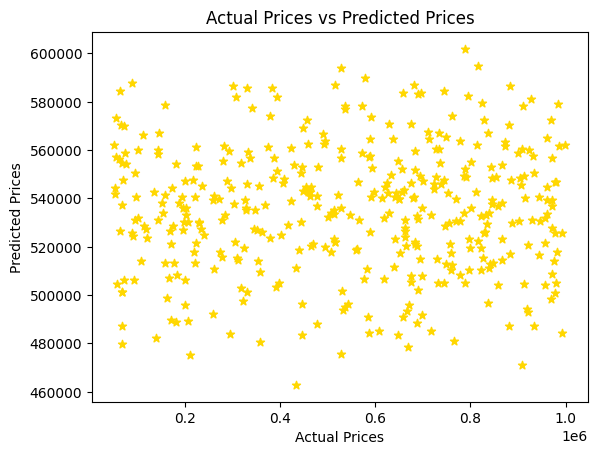

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(y_test,y_test_pred,color='Gold',marker="*")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()